# Own model
This Jupyter notebook is divided into three main parts. The first part under the Markdown [“Google Colab”](#google-colab) contains the necessary preparation and instructions to train the models in Google Colab. The second part under the Markdown [“Local”](#local) contains the necessary preparation and instructions to train the models locally. The third and last part under the Markdown ["Model"](#models) contains all models which are functional with the respective preparation in Google Colab as well as locally.

# Google Colab
The code below is intended for execution in Google Colab. To execute the code in Google Colab you have to comment out the above import for Google Colab and compress the already restructured folder into a zip file and upload “Dataset_Original.zip” to your Google Drive.

You can then extract the folder with the ZIP extractor.

<img src="ImageLib/GoogleDriveZip.jpg" alt="GoogleDrive image" style="width:700px;"/>


In [ ]:
#Imports to work in Google Colab
from google.colab import drive 
drive.mount('/content/drive') 

import tensorflow as tf
import matplotlib.pyplot as plt

In the below Code first defines the paths for the training and test data directories. The image size is set to 224x224 pixels and the image shape takes into account three color channels (RGB). The batch size for processing is 32 images.
When loading the datasets, the training dataset is split into 75% training data and 25% validation data, while the test dataset contains all images from the test directory. The data sets are randomly mixed, whereby a seed value ensures reproducibility.
The class names are extracted from the training dataset and output. A normalization layer is used to scale the image pixels to a range of 0-1, and this normalization is applied to all datasets. Caching and prefetching of the datasets is used to increase efficiency.
Finally, data augmentation is defined that includes random augmentations such as horizontal flipping, rotation and zooming to make the model more robust and avoid overfitting.

In [ ]:
# Directories for training and test data
train_dir = '/content/drive/MyDrive/ML2/Dataset_Original/train'
test_dir = '/content/drive/MyDrive/ML2/Dataset_Original/test'

# Image sizes and batch size
IMAGE_SIZE = (224, 224) 
IMAGE_SHAPE = IMAGE_SIZE + (3,) 
BATCH_SIZE = 32


# Load the images from the directories
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.25,
    subset="training"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.25,
    subset="validation"
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999
)

class_names = train_dataset.class_names
print("Klassennamen:", class_names)


# Add standardization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize the datasets
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Prefetching und Caching for efficiency
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Definiere die Datenaugmentierungsschichten
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Local

This code can be executed locally. It uses the data augmentation script [“dataPreparation.py”](dataPreparation.py). A more detailed description of the script can be found below under the markdown [Data preparation](#data-preparation).

Below you will find the necessary imports for the local execution of the code

In [8]:
#Imports to work local
import tensorflow as tf
import matplotlib.pyplot as plt
from dataPreparation import load_and_prepare_datasets, get_data_augmentation

### Data preparation
Please check that the path to your data set matches.

The Code first defines the paths for the training and test data directories. The image size is set to 224x224 pixels and the image shape takes into account three color channels (RGB). The batch size for processing is 32 images.

In the function "load_and_prepare_datasets" the dataset is loaded, when loading the datasets, the training dataset is split into 75% training data and 25% validation data, while the test dataset contains all images from the test directory. The data sets are randomly mixed, whereby a seed value ensures reproducibility. Afterwards, the class names are extracted from the training dataset. Finally, a normalization layer is used to scale the image pixels to a range of 0-1, and this normalization is applied to all datasets. Caching and prefetching of the datasets is used to increase efficiency.


The function "get_data_augmentation" includes random augmentations such as horizontal flipping, rotation and zooming to make the model more robust and avoid overfitting.

In [9]:
# Directories for training and test data
train_dir = 'Dataset_Original/train'
test_dir = 'Dataset_Original/test'


# Image sizes and batch size
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = IMAGE_SIZE + (3,)
BATCH_SIZE = 32

# Load and prepare the dataset
train_dataset, validation_dataset, test_dataset, class_names = load_and_prepare_datasets(train_dir, test_dir, IMAGE_SIZE, BATCH_SIZE)

# Show class names
print("Klassennamen:", class_names)

# Get the data augmentation layers
data_augmentation = get_data_augmentation()

Found 1178 files belonging to 3 classes.
Using 884 files for training.
Found 1178 files belonging to 3 classes.
Using 294 files for validation.
Found 393 files belonging to 3 classes.
Klassennamen: ['gls', 'nlb', 'nls']


# Models

In this Section you will find 5 Models.

[Model 1](#model-1)

[Model 2](#model-2)

[Model 3](#model-3)

[Model 4](#model-4)

[Model 5 EfficientNetB0](#model-5-efficientnetb0)

At the end of this section you will find a small code to safe the models and the class names

[Safe](#safe)

### Model 1

I started with Model 1 with a simple CNN which consists of the following layers:

* An input layer to define the image dimensions.

* A data augmentation layer to expand the training data.

* Three convolutional layers with ReLU activation for feature recognition.

* Two max-pooling layers for dimension reduction.

* One flattening layer for conversion into a flat structure.

* A dense layer with 64 neurons for feature processing.

* One output layer for classification into 3 classes.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,163 (42.47 MB)

 Trainable params: 11,132,163 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 533ms/step - accuracy: 0.3041 - loss: 2.7338 - val_accuracy: 0.6190 - val_loss: 0.8848
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 564ms/step - accuracy: 0.5664 - loss: 0.8502 - val_accuracy: 0.6361 - val_loss: 0.9063
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 547ms/step - accuracy: 0.6455 - loss: 0.6893 - val_accuracy: 0.7585 - val_loss: 0.6397
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 531ms/step - accuracy: 0.7113 - loss: 0.6080 - val_accuracy: 0.7177 - val_loss: 0.6444
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 521ms/step - accuracy: 0.7451 - loss: 0.5993 - val_accuracy: 0.7143 - val_loss: 0.7443
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 539ms/step - accuracy: 0.7558 - loss: 0.5353 - val_accuracy: 0.7925 - val_loss: 0.5659
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 561ms/step - accuracy: 0.7833 - loss: 0.4931 - val_accuracy: 0.8061 - val_loss: 0.5195
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 531ms/step - accuracy: 0.8106 - loss: 0.4777 - val_accu

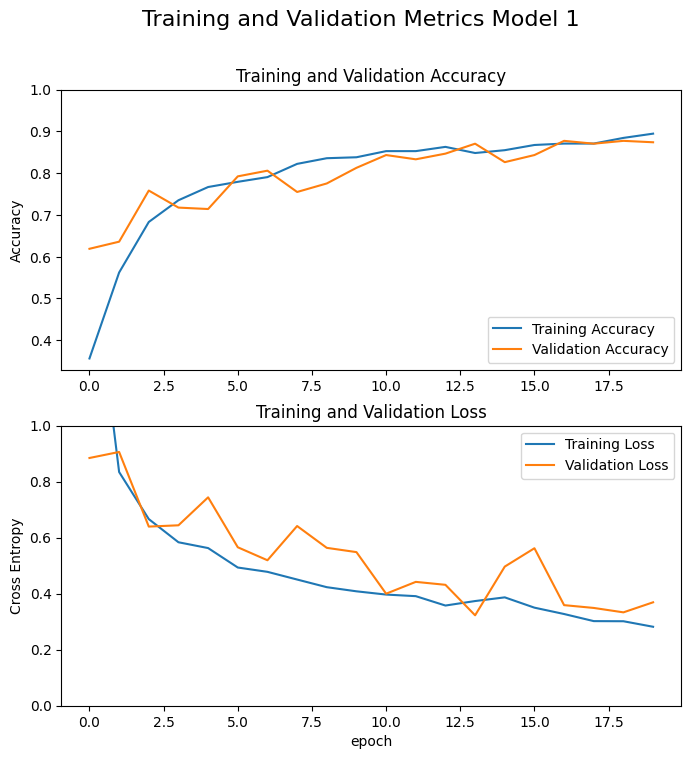

In [36]:
# Define the CNN model 1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])
model_1.summary()

# Compile the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model_1.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)

# Evaluate
test_loss, test_acc = model_1.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')

plt.suptitle('Training and Validation Metrics Model 1', fontsize=16)
plt.show()

### Model 2

Most important differences between Model 1 and Model 2:

* Three dropout layers added.
* Filter size in last layer extended.
* Dense layer extended.
* Softmax activation for multi-class classification instead of no explicit activation function.

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


c:\Users\flavi\Desktop\Studium\6.Semester\ML2\Projekt\ML2Project\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 517ms/step - accuracy: 0.3155 - loss: 3.4891 - val_accuracy: 0.3537 - val_loss: 1.0984
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 609ms/step - accuracy: 0.3366 - loss: 1.0905 - val_accuracy: 0.4728 - val_loss: 1.0463
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 591ms/step - accuracy: 0.4935 - loss: 0.9473 - val_accuracy: 0.5850 - val_loss: 0.9264
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.6004 - loss: 0.8046 - val_accuracy: 0.6803 - val_loss: 0.8200
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 583ms/step - accuracy: 0.6255 - loss: 0.7419 - val_accuracy: 0.5476 - val_loss: 1.0041
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 638ms/step - accuracy: 0.6860 - loss: 0.6757 - val_accuracy: 0.6803 - val_loss: 0.7206
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 625ms/step - accuracy: 0.7538 - loss: 0.5701 - val_accuracy: 0.8231 - val_loss: 0.6033
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 620ms/step - accuracy: 0.7635 - loss: 0.5819 - val_accuracy: 0.792

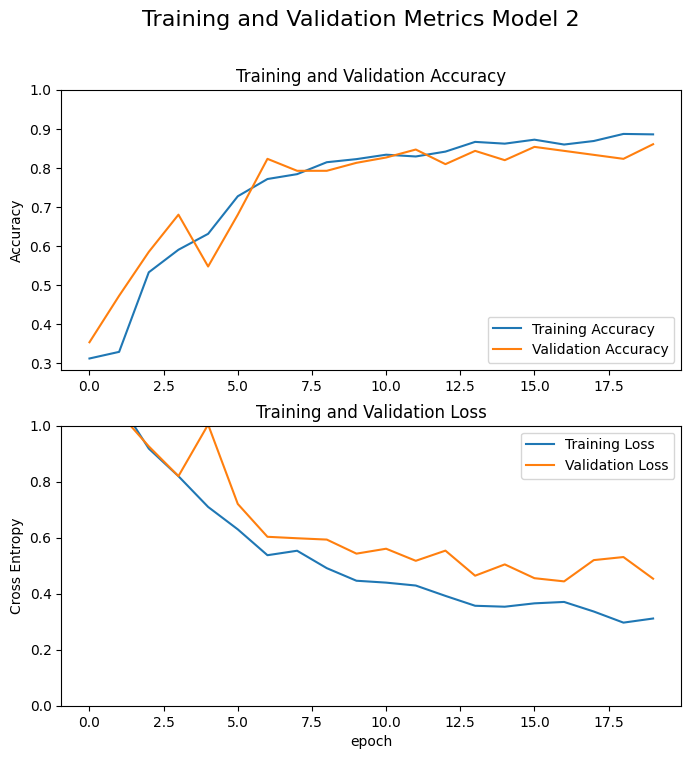

In [37]:
# Define the CNN model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')  # Für Mehrklassenklassifikation
])
model_2.summary()

# Compile the model
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model_2.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)

# Evaluate
test_loss, test_acc = model_2.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')

plt.suptitle('Training and Validation Metrics Model 2', fontsize=16)
plt.show()

### Model 3

Most important differences between Model 2 and Model 3:
* Additional convolutional layer with 256 filters added.
* Filter size in last layer extended.
* Dense layer extended.
* Kernel regularization (L2) added to convolutional and dense layers.
* Three dropout layers adjusted to a rate of 0.5.
* Softmax activation for multi-class classification retained.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,859,139 (37.61 MB)

 Trainable params: 9,859,139 (37.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 750ms/step - accuracy: 0.3118 - loss: 1.8941 - val_accuracy: 0.3878 - val_loss: 1.5051
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 776ms/step - accuracy: 0.4285 - loss: 1.4366 - val_accuracy: 0.3810 - val_loss: 1.3187
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 891ms/step - accuracy: 0.4771 - loss: 1.2454 - val_accuracy: 0.4762 - val_loss: 1.2480
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 855ms/step - accuracy: 0.5748 - loss: 1.0118 - val_accuracy: 0.6633 - val_loss: 0.9020
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 867ms/step - accuracy: 0.5828 - loss: 0.9327 - val_accuracy: 0.6701 - val_loss: 0.7868
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 839ms/step - accuracy: 0.6391 - loss: 0.8478 - val_accuracy: 0.5986 - val_loss: 0.8775
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 851ms/step - accuracy: 0.6019 - loss: 0.8595 - val_accuracy: 0.6361 - val_loss: 0.7469
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 875ms/step - accuracy: 0.6333 - loss: 0.8069 - val_accu

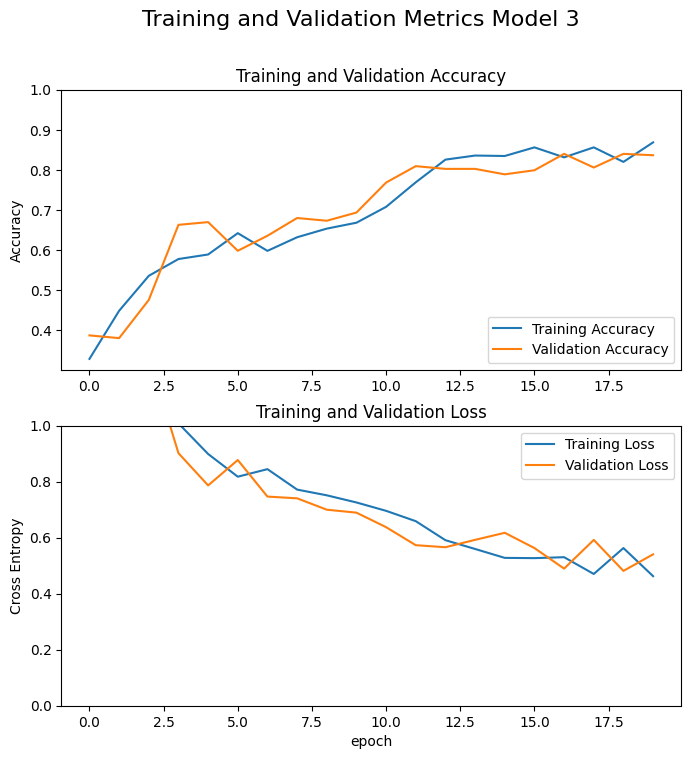

In [38]:
# Define the CNN model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_3.summary()

# Compile the model
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model_3.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)

# Evaluate
test_loss, test_acc = model_3.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')

plt.suptitle('Training and Validation Metrics Model 3', fontsize=16)
plt.show()

### Model 4

Most important differences between Model 3 and Model 4:
* Kernel regularization (L2) removed.
* Learning rate schedule added (ExponentialDecay).
* Callbacks added (EarlyStopping and ModelCheckpoint).

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,859,139 (37.61 MB)

 Trainable params: 9,859,139 (37.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 600ms/step - accuracy: 0.3115 - loss: 1.2584 - val_accuracy: 0.4796 - val_loss: 1.0051
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 671ms/step - accuracy: 0.5044 - loss: 0.9898 - val_accuracy: 0.6871 - val_loss: 0.6897
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 663ms/step - accuracy: 0.4781 - loss: 1.0602 - val_accuracy: 0.6769 - val_loss: 0.6851
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 654ms/step - accuracy: 0.6133 - loss: 0.8154 - val_accuracy: 0.6497 - val_loss: 0.6989
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 702ms/step - accuracy: 0.6693 - loss: 0.6276 - val_accuracy: 0.7381 - val_loss: 0.6866
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 700ms/step - accuracy: 0.7725 - loss: 0.5752 - val_accuracy: 0.8027 - val_loss: 0.5440
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 787ms/step - accuracy: 0.8032 - loss: 0.5479 - val_accuracy: 0.8061 - val_loss: 0.4581
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 802ms/step - accuracy: 0.8299 - loss: 0.5263 - val_accu

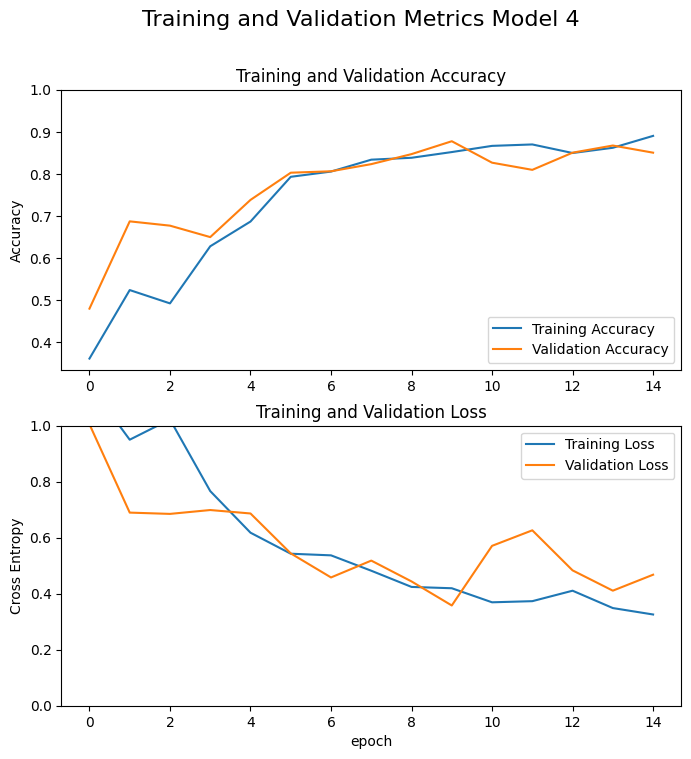

In [26]:
# Define the CNN model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SHAPE),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])
model_4.summary()

# Learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model_4.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='modelLib/modelTraining/best_model.keras', save_best_only=True, monitor='val_loss'),
]

# Train the model
history = model_4.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model_4.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


# Visualize the training progress
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.legend(loc='upper right')

plt.suptitle('Training and Validation Metrics Model 4', fontsize=16)
plt.show()

### Model 5 EfficientNetB0
I have also tried to fine-tune the model EfficientNetB0 below. Unfortunately, despite my best efforts, I have not achieved satisfactory training results. Either the model was resistant to training or overfitted within a few epochs. I suspect that the reason for the bad training behavior lies in the size of my data set which, despite data augmentation, can have too little influence on this large model.

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - loss: 1.6946 - sparse_categorical_accuracy: 0.3774
Initial loss: 1.695
Initial accuracy: 0.354
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 619ms/step - loss: 1.9204 - sparse_categorical_accuracy: 0.3395 - val_loss: 1.6850 - val_sparse_categorical_accuracy: 0.3061 - learning_rate: 0.0010
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 634ms/step - loss: 1.8577 - sparse_categorical_accuracy: 0.3871 - val_loss: 1.6664 - val_sparse_categorical_accuracy: 0.3401 - learning_rate: 0.0010
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 629ms/step - loss: 1.8764 - sparse_categorical_accuracy: 0.3471 - val_loss: 1.6511 - val_sparse_categorical_accuracy: 0.3401 - learning_rate: 0.0010
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 631ms/step - loss: 1.8089 - sparse_categorical_accuracy: 0.3307 - val_loss: 1.6361 - val_sparse_categorical_accuracy: 0.3061 - learning_rate: 0.0010
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 639ms/step - loss: 1.7862 - sparse_categorical_accuracy:

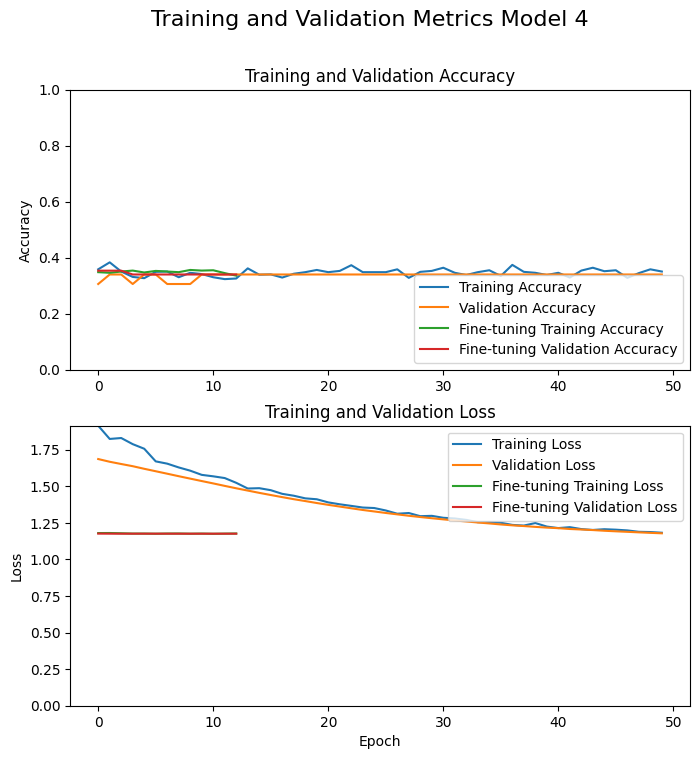

In [41]:
# Load EfficientNetB0 model, excluding the top layers
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', 
                                                  include_top=False, 
                                                  input_shape=IMAGE_SHAPE)
base_model.trainable = False  # Freeze the base model

# Preprocess input for EfficientNet
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

# Define the EfficientNet model with additional layers
inputs = tf.keras.Input(shape=IMAGE_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)  # Erhöhte Lernrate
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_loss')

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Initial evaluation
loss0, accuracy0 = model.evaluate(validation_dataset)
print(f'Initial loss: {loss0:.3f}')
print(f'Initial accuracy: {accuracy0:.3f}')

# Train the model
history = model.fit(
    train_dataset,
    epochs=50,  # Mehr Epochen
    validation_data=validation_dataset,
    callbacks=callbacks
)

# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Unfreeze die letzten 20 Schichten
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# Continue training the model
history_finetune = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Test loss: {test_loss:.3f}')
print(f'Test accuracy: {test_acc:.3f}')

# Visualize the training progress
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.title('Training and Validation Accuracy')
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.plot(history_finetune.history['sparse_categorical_accuracy'], label='Fine-tuning Training Accuracy')
plt.plot(history_finetune.history['val_sparse_categorical_accuracy'], label='Fine-tuning Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_finetune.history['loss'], label='Fine-tuning Training Loss')
plt.plot(history_finetune.history['val_loss'], label='Fine-tuning Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']), max(history_finetune.history['loss']), max(history_finetune.history['val_loss']))])
plt.legend(loc='upper right')

plt.suptitle('Training and Validation Metrics Model 5', fontsize=16)
plt.show()

### Safe
Use the following code to save the model and class names if you want to use the application with frontend and backend. However, I have already included the [class names](modelLib\class_names.txt) in the Git repository. The best performing Model can be Downloaded under this [Link](https://drive.google.com/file/d/1V0v4B_IYpotUxO0HR0dte98KOC00wtex/view?usp=drive_link) and placed in the same directory as the class_name.txt file. You only need to execute this code if you want to load other models into the backend. You would have to customize the backend yourself as described in the [Python](backend\app.py) file.

In [30]:
#Safe model
model_4.save('modelLib/model_4.keras')

#Safe class names
#with open('modelLib/class_names.txt', 'w') as f:
#    for class_name in class_names:
#        f.write("%s\n" % class_name)